In [ ]:
import cv2
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [4]:
CT_SCANS = "../rawdata/ct_scans"
INFECTION_MASKS = "../rawdata/infection_mask"
LUNGANDINFECTION_MASKS = "../rawdata/lung_and_infection_mask"
LUNG_MASKS = "../rawdata/lung_mask"

## Understanding NIfTI (Neuroimaging Informatics Technology Initiative) Format

In [5]:
ct_nii = nib.load(f"{CT_SCANS}/coronacases_org_001.nii")
image_data = ct_nii.get_fdata()

In [6]:
# Access metadata
header: nib.nifti1.Nifti1Header = ct_nii.header
affine = ct_nii.affine

In [7]:
print("Image shape:", image_data.shape)
print("Affine transformation:\n", affine)
print("Header:\n", header)

Image shape: (512, 512, 301)
Affine transformation:
 [[  -0.81054699    0.            0.          213.10714722]
 [  -0.            0.81054699    0.         -206.89215088]
 [   0.           -0.            1.         -220.05334473]
 [   0.            0.            0.            1.        ]]
Header:
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 512 512 301   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.810547  0.810547  1.        1.        1.        1.
  1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min 

## Preprocessing

Image refinement

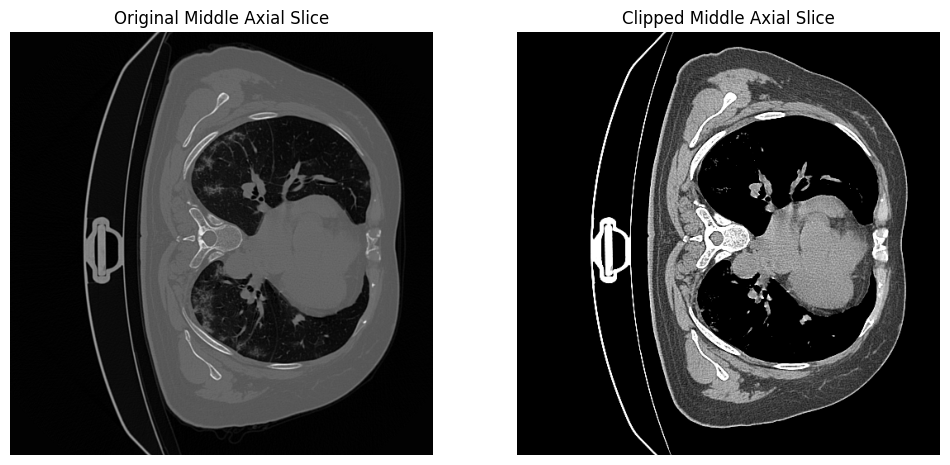

In [41]:
# Display the middle slice in the axial plane
middle_slice = image_data.shape[2] // 2
clipped_data = np.clip(image_data[:, :, middle_slice], -200, 200)

# Display the original middle slice
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, middle_slice], cmap='gray')
plt.title('Original Middle Axial Slice')
plt.axis('off')

# Display the clipped middle slice
plt.subplot(1, 2, 2)
plt.imshow(clipped_data, cmap='gray')
plt.title('Clipped Middle Axial Slice')
plt.axis('off')

plt.show()

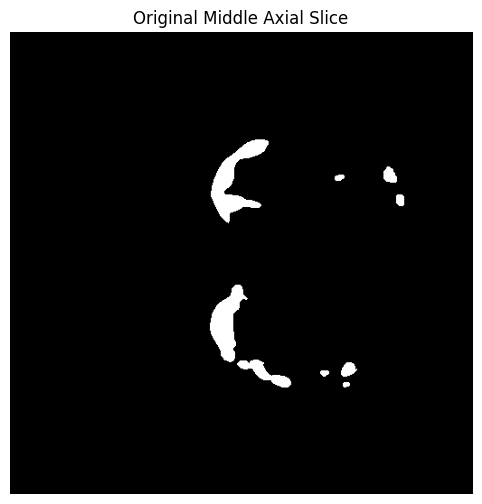

In [ ]:
l_i_nii = nib.load(f"{INFECTION_MASKS}/coronacases_001.nii")
l_i_data = l_i_nii.get_fdata()
middle_slice = l_i_data.shape[2] // 2

# Display the original middle slice
plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
plt.imshow(l_i_data[:, :, middle_slice], cmap='gray')
plt.title('Original Middle Axial Slice')
plt.axis('off')
plt.show()